## Day 29 Lecture 1 Assignment

In this assignment, we will learn about decision trees. We will use the Chicago salary dataset loaded below.

In [131]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [132]:
chicago = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [133]:
chicago.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


To simplify this problem, we will limit our model to only salary employees. Create a new dataset that does not contain any hourly employees.

In [134]:
# answer below:
chicago = chicago[chicago['Salary or Hourly'] == 'Salary']
chicago['Salary or Hourly'].unique()

array(['Salary'], dtype=object)

Next, we will look at the count of all values for both job titles and department to ensure that we don't use features that are too sparse in our model.

In [135]:
# answer below:
chicago['Job Titles'].value_counts()


POLICE OFFICER                            9393
FIREFIGHTER-EMT                           1424
SERGEANT                                  1118
POLICE OFFICER (ASSIGNED AS DETECTIVE)     845
FIREFIGHTER                                564
                                          ... 
IT SECURITY SPECIALIST                       1
ZONING ADMINISTRATOR                         1
REPROGRAPHICS COORD                          1
WATER CONSERVATION ENGINEER                  1
TESTING MANAGER                              1
Name: Job Titles, Length: 954, dtype: int64

In [136]:
chicago['Department'].value_counts()


POLICE                   12941
FIRE                      4798
OEMC                       832
PUBLIC LIBRARY             708
AVIATION                   556
FINANCE                    532
HEALTH                     512
TRANSPORTN                 396
WATER MGMNT                366
LAW                        361
CITY COUNCIL               348
FAMILY & SUPPORT           321
STREETS & SAN              321
BUILDINGS                  266
COMMUNITY DEVELOPMENT      210
GENERAL SERVICES           205
BUSINESS AFFAIRS           160
BOARD OF ELECTION          112
DoIT                       101
PROCUREMENT                 82
CITY CLERK                  82
MAYOR'S OFFICE              78
HUMAN RESOURCES             67
CULTURAL AFFAIRS            66
INSPECTOR GEN               63
ANIMAL CONTRL               57
IPRA                        56
BUDGET & MGMT               43
ADMIN HEARNG                38
DISABILITIES                29
TREASURER                   23
COPA                        17
HUMAN RE

Choose the between department and job title and use the variable with the smallest number of values to for one hot encoding. Additionally, create dummy variables for full ot part-time.

In [137]:
# answer below:
department = pd.get_dummies(chicago['Department'])
chicago = chicago.drop('Department', axis = 1)
chicago = pd.concat([chicago, department], axis = 1)
chicago

,Name,Job Titles,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,COMMUNITY DEVELOPMENT,COPA,CULTURAL AFFAIRS,DISABILITIES,DoIT,FAMILY & SUPPORT,FINANCE,FIRE,GENERAL SERVICES,HEALTH,HUMAN RELATIONS,HUMAN RESOURCES,INSPECTOR GEN,IPRA,LAW,LICENSE APPL COMM,MAYOR'S OFFICE,OEMC,POLICE,POLICE BOARD,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT
0,"ALLISON, PAUL W",LIEUTENANT,F,Salary,NaN,$107790.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"BRUNO, KEVIN D",SERGEANT,F,Salary,NaN,$104628.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,"COOPER, JOHN E",LIEUTENANT-EMT,F,Salary,NaN,$114324.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"CRESPO, VILMA I",STAFF ASST,F,Salary,NaN,$76932.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"DOLAN, ROBERT J",SERGEANT,F,Salary,NaN,$111474.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32653,"ZYGOWICZ, PETER J",POLICE OFFICER,F,Salary,NaN,$90024.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32654,"ZYLINSKA, KATARZYNA",POLICE OFFICER,F,Salary,NaN,$48078.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32655,"ZYMANTAS, MARK E",POLICE OFFICER,F,Salary,NaN,$87006.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32656,"ZYRKOWSKI, CARLO E",POLICE OFFICER,F,Salary,NaN,$93354.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [138]:
full_part = pd.get_dummies(chicago['Full or Part-Time'], drop_first=True)
chicago = chicago.drop('Full or Part-Time', axis = 1)
chicago = pd.concat([chicago, full_part], axis = 1)
chicago

,Name,Job Titles,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,COMMUNITY DEVELOPMENT,COPA,CULTURAL AFFAIRS,DISABILITIES,DoIT,FAMILY & SUPPORT,FINANCE,FIRE,GENERAL SERVICES,HEALTH,HUMAN RELATIONS,HUMAN RESOURCES,INSPECTOR GEN,IPRA,LAW,LICENSE APPL COMM,MAYOR'S OFFICE,OEMC,POLICE,POLICE BOARD,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT,P
0,"ALLISON, PAUL W",LIEUTENANT,Salary,NaN,$107790.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"BRUNO, KEVIN D",SERGEANT,Salary,NaN,$104628.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"COOPER, JOHN E",LIEUTENANT-EMT,Salary,NaN,$114324.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"CRESPO, VILMA I",STAFF ASST,Salary,NaN,$76932.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,"DOLAN, ROBERT J",SERGEANT,Salary,NaN,$111474.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32653,"ZYGOWICZ, PETER J",POLICE OFFICER,Salary,NaN,$90024.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32654,"ZYLINSKA, KATARZYNA",POLICE OFFICER,Salary,NaN,$48078.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32655,"ZYMANTAS, MARK E",POLICE OFFICER,Salary,NaN,$87006.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32656,"ZYRKOWSKI, CARLO E",POLICE OFFICER,Salary,NaN,$93354.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Remove all irrelevant columns (Name, Job Titles, Salary or Hourly, Typical Hours, Hourly Rate)

In [139]:
# answer below:
chicago = chicago.drop(['Name', 'Job Titles', 'Salary or Hourly', 'Typical Hours', 'Hourly Rate'], axis = 1)
chicago

,Annual Salary,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,COMMUNITY DEVELOPMENT,COPA,CULTURAL AFFAIRS,DISABILITIES,DoIT,FAMILY & SUPPORT,FINANCE,FIRE,GENERAL SERVICES,HEALTH,HUMAN RELATIONS,HUMAN RESOURCES,INSPECTOR GEN,IPRA,LAW,LICENSE APPL COMM,MAYOR'S OFFICE,OEMC,POLICE,POLICE BOARD,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT,P
0,$107790.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,$104628.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,$114324.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,$76932.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,$111474.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32653,$90024.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32654,$48078.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32655,$87006.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32656,$93354.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Check that none of the remaining columns are of object type and convert them to numeric if they are of object type.

In [140]:
# answer below:
chicago.dtypes


Annual Salary            object
ADMIN HEARNG              uint8
ANIMAL CONTRL             uint8
AVIATION                  uint8
BOARD OF ELECTION         uint8
BOARD OF ETHICS           uint8
BUDGET & MGMT             uint8
BUILDINGS                 uint8
BUSINESS AFFAIRS          uint8
CITY CLERK                uint8
CITY COUNCIL              uint8
COMMUNITY DEVELOPMENT     uint8
COPA                      uint8
CULTURAL AFFAIRS          uint8
DISABILITIES              uint8
DoIT                      uint8
FAMILY & SUPPORT          uint8
FINANCE                   uint8
FIRE                      uint8
GENERAL SERVICES          uint8
HEALTH                    uint8
HUMAN RELATIONS           uint8
HUMAN RESOURCES           uint8
INSPECTOR GEN             uint8
IPRA                      uint8
LAW                       uint8
LICENSE APPL COMM         uint8
MAYOR'S OFFICE            uint8
OEMC                      uint8
POLICE                    uint8
POLICE BOARD              uint8
PROCUREM

In [141]:
chicago['Annual Salary'] = chicago['Annual Salary'].map(lambda x: float(x[1:]))
chicago.dtypes

Annual Salary            float64
ADMIN HEARNG               uint8
ANIMAL CONTRL              uint8
AVIATION                   uint8
BOARD OF ELECTION          uint8
BOARD OF ETHICS            uint8
BUDGET & MGMT              uint8
BUILDINGS                  uint8
BUSINESS AFFAIRS           uint8
CITY CLERK                 uint8
CITY COUNCIL               uint8
COMMUNITY DEVELOPMENT      uint8
COPA                       uint8
CULTURAL AFFAIRS           uint8
DISABILITIES               uint8
DoIT                       uint8
FAMILY & SUPPORT           uint8
FINANCE                    uint8
FIRE                       uint8
GENERAL SERVICES           uint8
HEALTH                     uint8
HUMAN RELATIONS            uint8
HUMAN RESOURCES            uint8
INSPECTOR GEN              uint8
IPRA                       uint8
LAW                        uint8
LICENSE APPL COMM          uint8
MAYOR'S OFFICE             uint8
OEMC                       uint8
POLICE                     uint8
POLICE BOA

In [142]:
chicago['P'].value_counts()

0    24770
1        5
Name: P, dtype: int64

Split the data into a test and train sample. Use annual salary as the dependent variable. 20% of the data should be assigned to the test sample.

In [143]:
# answer below:
from sklearn.model_selection import train_test_split

y = chicago['Annual Salary']
X = chicago.drop('Annual Salary', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Generate a regession decision tree using `DecisionTreeRegressor` in sklearn. Fit the model on the training set and calculate the score for both train and test.

In [144]:
# answer below:
from sklearn import tree
reg_tree = tree.DecisionTreeRegressor(max_depth = 10, min_samples_split=100)
reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

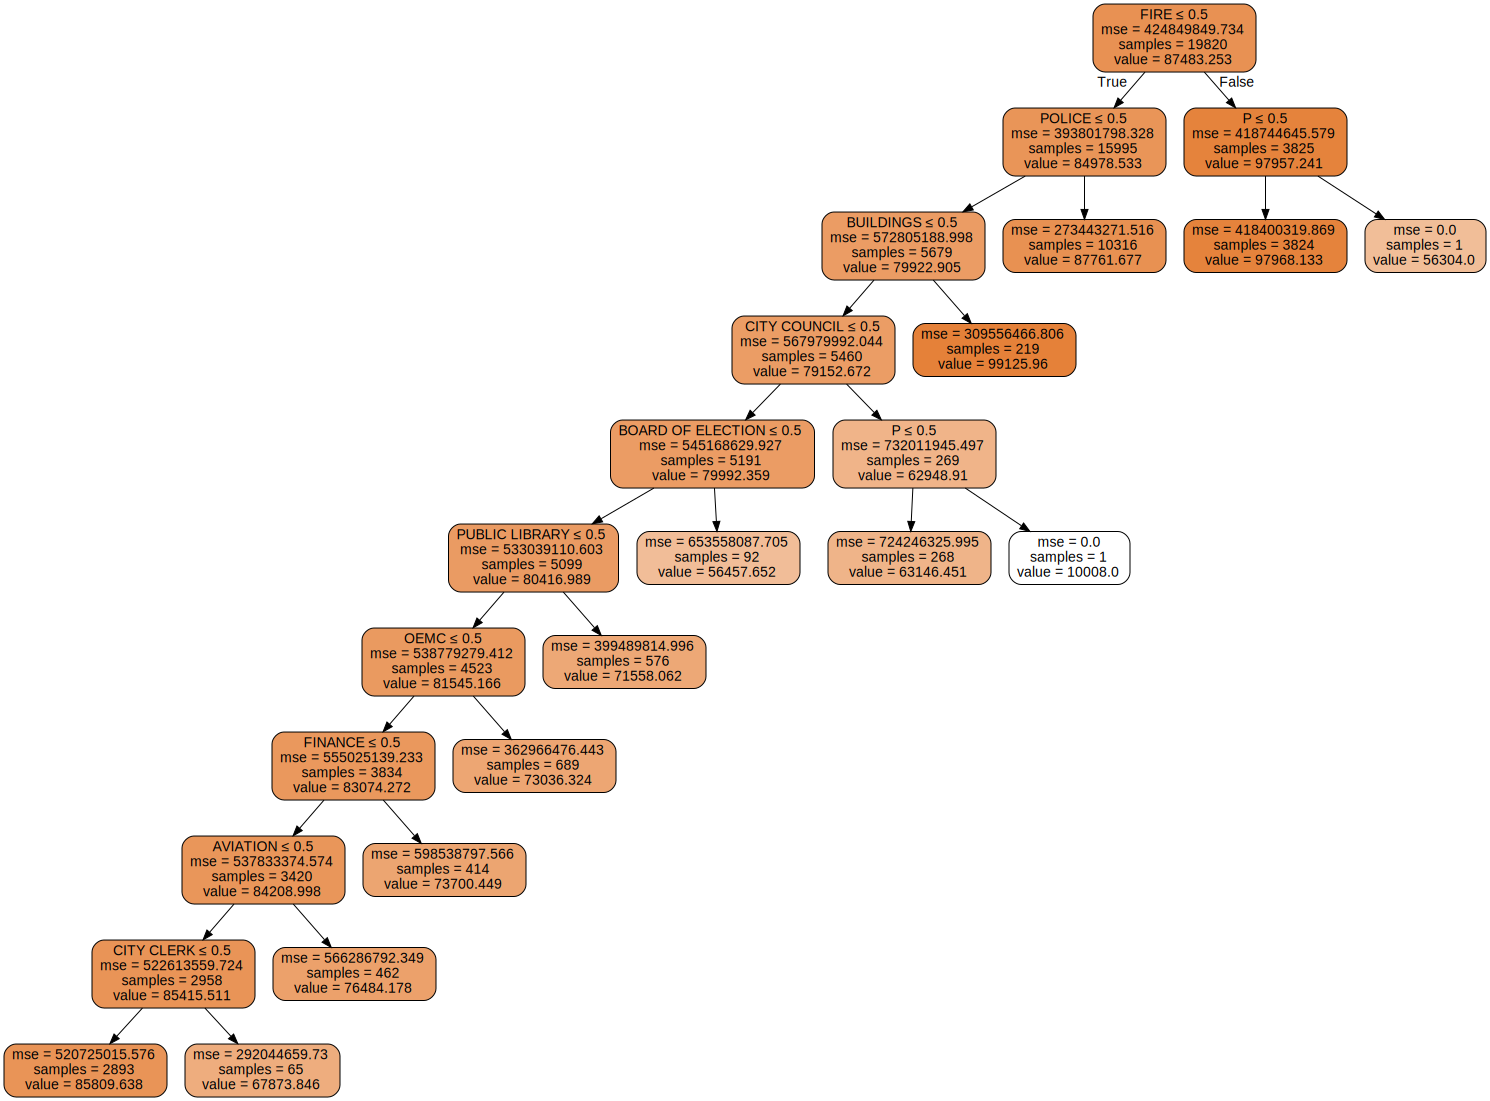

In [145]:
import graphviz

dot_data = tree.export_graphviz(reg_tree, out_file = None,
                                feature_names=X_train.columns, filled=True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [146]:
print('Max Depth 10 Train score: ',reg_tree.score(X_train, y_train))
print('Max Depth 10 Test score: ',reg_tree.score(X_test, y_test))

Train score:  0.13807361774878169
Test score:  0.13136142067844458


In [148]:
reg_tree1 = tree.DecisionTreeRegressor(max_depth = 36, min_samples_split=100)
reg_tree1.fit(X_train, y_train)
print('Max Depth 36 Train score: ',reg_tree1.score(X_train, y_train))
print('Max Depth 36 Test score: ',reg_tree1.score(X_test, y_test))

Max Depth 36 Train score:  0.1481150812435137
Max Depth 36 Test score:  0.13962699312841653
